In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection #cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import metrics # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2
from sklearn.feature_selection import SelectFromModel, RFECV

C:\Users\Porti\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Carga de la data

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,cycle,setting1,setting2,setting3,sen1,sen2,sen3,sen4,sen5,...,sen13,sen14,sen15,sen16,sen17,sen18,sen19,sen20,sen21,ttf
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,cycle,setting1,setting2,setting3,sen1,sen2,sen3,sen4,sen5,...,sen13,sen14,sen15,sen16,sen17,sen18,sen19,sen20,sen21,RUL
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,112
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,98
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,69
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,82
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,91


# Modelado con técnicas de regresión

In [4]:
# Se prepara la data para los modelos de regresión

# atributos de interes
atributos = ['setting1','setting2','setting3','sen1','sen2', 'sen3', 'sen4', 'sen5', 
             'sen6', 'sen7', 'sen8', 'sen9', 'sen10','sen11', 'sen12', 'sen13', 'sen14', 'sen15', 
             'sen16', 'sen17', 'sen18', 'sen19', 'sen20', 'sen21']

X_train = train_data[atributos]
y_train = train_data['ttf']

X_test = test_data[atributos]
y_test = test_data['RUL']

In [5]:
X_train.head()

,setting1,setting2,setting3,sen1,sen2,sen3,sen4,sen5,sen6,sen7,...,sen12,sen13,sen14,sen15,sen16,sen17,sen18,sen19,sen20,sen21
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
y_train.head()

0    191
1    190
2    189
3    188
4    187
Name: ttf, dtype: int64

In [7]:
X_test.head()

,setting1,setting2,setting3,sen1,sen2,sen3,sen4,sen5,sen6,sen7,...,sen12,sen13,sen14,sen15,sen16,sen17,sen18,sen19,sen20,sen21
0,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,...,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552
1,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,...,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618
2,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,...,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740
3,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,21.61,552.64,...,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581
4,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,21.61,553.29,...,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117


In [8]:
y_test.head()

0    112
1     98
2     69
3     82
4     91
Name: RUL, dtype: int64

__Se creará una función que permite calcular las metricas de regresión más importantes__

In [9]:
def metricas(modelo, real, prediccion):
    
    """Calcula las metricas principales de regresión.
    
    Args:
        modelo (str): identificador del modelo empleado.
        real (series): Contiene los valores de las etiquetas de prueba.
        prediccion (series): Contiene los valores predichos.
        
    Returns:
        dataframe: Todas las metricas en un dataframe.
    
    
    """
    
    
    metricas_regresion = {'Root Mean Squared Error' : metrics.mean_squared_error(real, prediccion)**0.5, 
                         'Mean Absolute Error' : metrics.mean_absolute_error(real, prediccion),
                         'R^2' : metrics.r2_score(real, prediccion),
                         'Explained Variance' : metrics.explained_variance_score(real, prediccion),
                        }
    
    df_metricas = pd.DataFrame.from_dict(metricas_regresion, orient= 'index' )
    df_metricas.columns = [modelo]
    
    return df_metricas

__Se creará una función que permita graficar los residuales de regresión.__

In [10]:
def residual(modelo, y_train, y_train_predict, y_test, y_test_predict):
    
    plt.scatter(y_train_predict, y_train_predict-y_train, c='blue', marker='+', label='Data de entrenamiento')
    plt.scatter(y_test_predict, y_test_predict-y_test, c='lightgreen', marker = 's', label= 'Data de prueba')
    plt.xlabel('Valores predichos')
    plt.ylabel('Residuales')
    plt.legend(loc='upper left')
    plt.title('Residuales '+ modelo)
    plt.show()

# Regresión Lineal

In [11]:
# Regresión lineal

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

linreg_metrics = metricas('Regresión Lineal', y_test, y_test_predict)
linreg_metrics

 R^2 entrenamiento: 0.580 

 R^2 prueba: 0.405


,Regresión Lineal
Root Mean Squared Error,32.041095
Mean Absolute Error,25.591780
R^2,0.405495
Explained Variance,0.665297


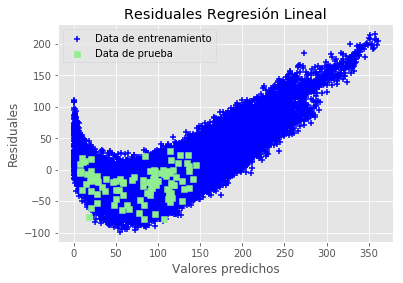

In [12]:
residual('Regresión Lineal', y_train_predict, y_train, y_test_predict, y_test)

In [13]:
lineal_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

lineal_pred = pd.DataFrame.from_dict(lineal_predic).T
lineal_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.00000,91.000000,95.000,111.000000,96.000000,...,38.000000,20.00000,85.000000,55.000000,128.000000,137.000000,82.000000,59.00000,117.000000,20.00000
Predicción,158.747422,122.157686,84.961762,98.611255,111.325958,122.08961,130.639407,94.899,113.907155,118.127195,...,52.248553,34.15082,62.677656,70.392335,145.805543,166.960635,108.219645,98.79815,161.853254,2.57941


# Regresión Polinomial

In [14]:
# Regresión polinomial

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

polyreg_metrics = metricas('Regresión Polinomial', y_test, y_test_predict)
polyreg_metrics

 R^2 entrenamiento: 0.626 

 R^2 prueba: 0.427


,Regresión Polinomial
Root Mean Squared Error,31.457293
Mean Absolute Error,23.950000
R^2,0.426962
Explained Variance,0.633468


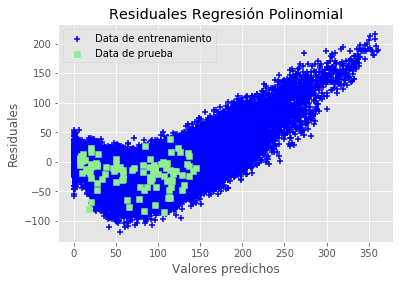

In [15]:
residual('Regresión Polinomial', y_train_predict, y_train, y_test_predict, y_test)

In [16]:
poly_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

poly_pred = pd.DataFrame.from_dict(poly_predic).T
poly_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Predicción,173.789062,140.289062,82.289062,98.289062,123.289062,119.789062,118.789062,102.789062,112.289062,109.289062,...,46.289062,28.289062,57.789062,63.789062,150.289062,160.789062,86.789062,87.789062,149.289062,-3.710938


# Regresión Vectores soportados

In [17]:
from sklearn.svm import SVR

vector_reg = SVR(kernel = 'linear')
vector_reg.fit(X_train, y_train)

y_test_predict = vector_reg.predict(X_test)
y_train_predict = vector_reg.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

svm_metrics = metricas('Vectores Soportados', y_test, y_test_predict)
svm_metrics

 R^2 entrenamiento: 0.494 

 R^2 prueba: 0.310


,Vectores Soportados
Root Mean Squared Error,34.511535
Mean Absolute Error,27.004160
R^2,0.310286
Explained Variance,0.445506


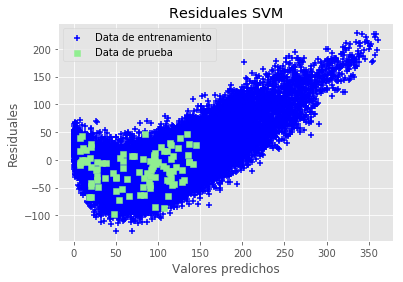

In [18]:
residual('SVM', y_train_predict, y_train, y_test_predict, y_test)

In [19]:
svm_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

svm_pred = pd.DataFrame.from_dict(svm_predic).T
svm_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.0000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Predicción,176.537495,105.183859,62.312551,80.345858,120.325226,107.855399,137.174396,90.674304,95.231356,96.009992,...,44.380662,-7.8472,39.072553,50.961234,145.684723,140.390721,130.117205,73.962242,162.867229,66.527359


# Regresión Árboles de Decisión

In [20]:
# Regresión por árboles de decisión

dtreg = DecisionTreeRegressor(max_depth=7)
dtreg.fit(X_train, y_train)

y_test_predict = dtreg.predict(X_test)
y_train_predict = dtreg.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

dtreg_metrics = metricas('Árboles de Decisión', y_test, y_test_predict)
dtreg_metrics

 R^2 entrenamiento: 0.625 

 R^2 prueba: 0.403


,Árboles de Decisión
Root Mean Squared Error,32.095349
Mean Absolute Error,24.319068
R^2,0.403480
Explained Variance,0.632767


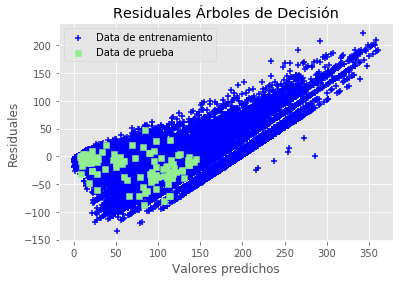

In [21]:
residual('Árboles de Decisión', y_train_predict, y_train, y_test_predict, y_test)

In [22]:
dt_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

dt_pred = pd.DataFrame.from_dict(dt_predic).T
dt_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.00
Predicción,161.220994,131.677632,47.828947,137.779592,128.150407,121.482014,137.095023,103.837079,128.150407,137.779592,...,17.850394,31.643678,38.428571,55.628931,153.578416,152.920204,65.130435,95.777027,156.464853,19.84


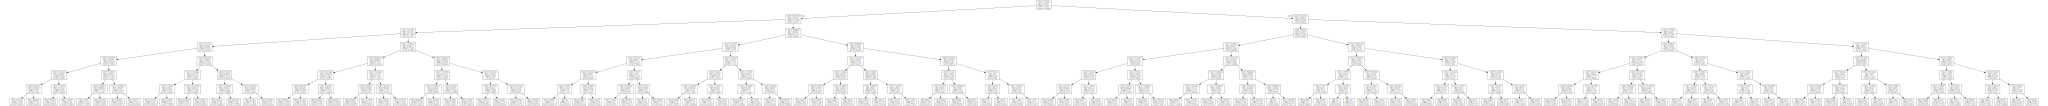

In [23]:
import graphviz

tree = export_graphviz(dtreg, out_file=None, feature_names=atributos)
graphviz.Source(tree)

# Reducción de características/atributos para el árbol de decisión

Número óptimo de atributos: 5
Los atributos seleccionados son: ['sen4', 'sen7', 'sen9', 'sen11', 'sen12']


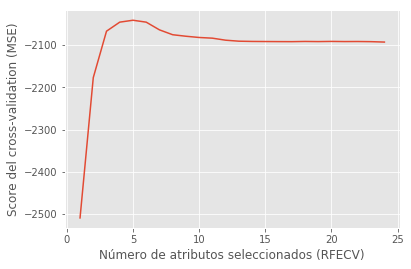

In [24]:
# Clasificación de características con eliminación de características recursivas.

rfecv = RFECV(estimator=dtreg, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rfecv.fit(X_train, y_train)

print('Número óptimo de atributos: %d' %rfecv.n_features_)

atrib_selec = [f for f,s in zip(X_train.columns, rfecv.support_) if s == True]
print('Los atributos seleccionados son: {}'.format(atrib_selec))

# Graficando el numero de atributos VS score del cross-validation

plt.figure()
plt.xlabel('Número de atributos seleccionados (RFECV)')
plt.ylabel('Score del cross-validation (MSE)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Regresión Árboles de Decisión con atributos reducidos.

In [25]:
# Árbol de decisión con los atributos seleccionados

#Se transforma la data con el el RFECV

X_train_trn = rfecv.transform(X_train)
X_test_trn = rfecv.transform(X_test)

dtreg = DecisionTreeRegressor(max_depth=7)

dtreg.fit(X_train_trn, y_train)

y_test_predict = dtreg.predict(X_test_trn)

dtreg_metrics_rfecv = metricas('Árbol de Decisión: Atributos seleccionados', y_test, y_test_predict)

dtr_metrics = pd.concat([dtreg_metrics, dtreg_metrics_rfecv], axis=1)

dtr_metrics

,Árboles de Decisión,Árbol de Decisión: Atributos seleccionados
Root Mean Squared Error,32.095349,34.212392
Mean Absolute Error,24.319068,25.866117
R^2,0.403480,0.322191
Explained Variance,0.632767,0.593892


__El rendimiento del modelo empleando solo los 5 atributos seleccionados es comparable al usar los 24 atributos.__

In [26]:
atrib = {}

for atributo, importancia in zip(atrib_selec, dtreg.feature_importances_):
    atrib[atributo] = importancia

importancia = pd.DataFrame.from_dict(atrib, orient = 'index').rename(columns = {0: 'Importancia'})
importancia.sort_values(by ='Importancia', ascending=False)

,Importancia
sen11,0.682967
sen9,0.168857
sen4,0.091236
sen12,0.033993
sen7,0.022948


In [27]:
dtr_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

dtr_pred = pd.DataFrame.from_dict(dtr_predic).T
dtr_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.00
Predicción,181.555556,129.711765,47.828947,137.779592,115.045455,121.482014,154.022472,104.625,132.523397,137.779592,...,24.793103,24.527778,55.290909,55.290909,153.578416,171.618661,79.380952,88.353982,158.021978,19.84


# Regresión Random Forest

In [28]:
rf = RandomForestRegressor(n_estimators=100, max_depth=4, max_features=3, n_jobs=-1)
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

rf_metrics = metricas('Random Forest', y_test, y_test_predict)
rf_metrics

 R^2 entrenamiento: 0.595 

 R^2 prueba: 0.510


,Random Forest
Root Mean Squared Error,29.098269
Mean Absolute Error,23.264423
R^2,0.509685
Explained Variance,0.751799


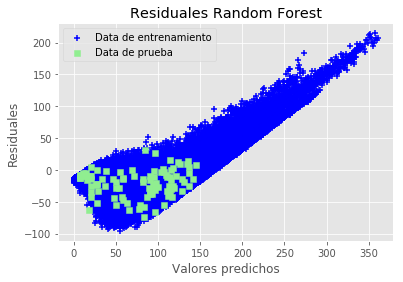

In [29]:
residual('Random Forest', y_train_predict, y_train, y_test_predict, y_test)

In [30]:
rf_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

rf_pred = pd.DataFrame.from_dict(rf_predic).T
rf_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Predicción,153.112304,118.523855,69.542819,101.252037,107.256855,130.461802,127.690758,96.835919,121.576399,127.520423,...,40.293469,29.822546,53.329945,58.118358,142.314567,162.483377,96.439195,105.474124,159.087199,34.787086


# Comparando las métricas de regresión

In [31]:
all_metricas = pd.concat([linreg_metrics, polyreg_metrics, svm_metrics, dtreg_metrics, rf_metrics], axis = 1)
all_metricas

,Regresión Lineal,Regresión Polinomial,Vectores Soportados,Árboles de Decisión,Random Forest
Root Mean Squared Error,32.041095,31.457293,34.511535,32.095349,29.098269
Mean Absolute Error,25.591780,23.950000,27.004160,24.319068,23.264423
R^2,0.405495,0.426962,0.310286,0.403480,0.509685
Explained Variance,0.665297,0.633468,0.445506,0.632767,0.751799


In [38]:
from bokeh.io import show
from bokeh.plotting import figure

p = figure()
p.diamond_cross(x=y_train_predict, y=(y_train_predict-y_train))
show(p)